積分もやはり、Sympy というライブラリが非常に便利です。Scipy もよく使われると思うけど、ちょっと使い方が難しい。

# Sympy を使った方法

In [1]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

指定した文字をシンボル（変数を表す文字）として扱います。

In [2]:
a, b, c, x, y = sym.symbols("a b c x y")

主要な数学関数を sympy からインポートしておきます。

In [3]:
from sympy import sin, cos, tan, log, exp

## 積分

Integral(x**a, x)


/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


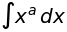

In [4]:
# 積分の式
expr  = x ** a
integ = sym.Integral(expr, x)
print(integ)
integ

In [5]:
# 積分の実行
integ.doit()

⎧ a + 1            
⎪x                 
⎪──────  for a ≠ -1
⎨a + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

In [6]:
# このように書いても同じ
sym.integrate(expr, x)

⎧ a + 1            
⎪x                 
⎪──────  for a ≠ -1
⎨a + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

In [7]:
# sym.Eq を使って等式として表記
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(x**a, x), Piecewise((x**(a + 1)/(a + 1), Ne(a, -1)), (log(x), True)))


          ⎧ a + 1            
⌠         ⎪x                 
⎮  a      ⎪──────  for a ≠ -1
⎮ x  dx = ⎨a + 1             
⌡         ⎪                  
          ⎪log(x)  otherwise 
          ⎩                  

## いろんな積分の公式

Eq(Integral(1/x, x), log(x))


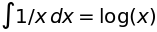

In [8]:
expr = 1/x
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

In [9]:
expr = a ** x
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(a**x, x), Piecewise((a**x/log(a), Ne(log(a), 0)), (x, True)))


          ⎧   x                  
⌠         ⎪  a                   
⎮  x      ⎪──────  for log(a) ≠ 0
⎮ a  dx = ⎨log(a)                
⌡         ⎪                      
          ⎪  x       otherwise   
          ⎩                      

Eq(Integral(exp(x), x), exp(x))


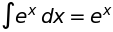

In [10]:
expr  = exp(x)
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(sin(x), x), -cos(x))


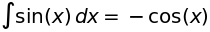

In [11]:
expr = sin(x)
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(cos(x), x), sin(x))


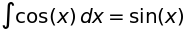

In [12]:
expr = cos(x)
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(tan(x), x), -log(cos(x)))


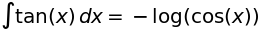

In [13]:
expr = tan(x)
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(log(x), x), x*log(x) - x)


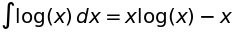

In [14]:
expr = log(x)
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(cos(x)**(-2), x), sin(x)/cos(x))


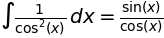

In [15]:
expr = 1/cos(x)**2
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral(sin(x)**(-2), x), -cos(x)/sin(x))


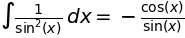

In [16]:
expr = 1/sin(x)**2
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

In [17]:
expr = (x-a)**b
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

Eq(Integral((-a + x)**b, x), Piecewise(((-a + x)**(b + 1)/(b + 1), Ne(b, -1)), (log(-a + x), True)))


                 ⎧        b + 1            
⌠                ⎪(-a + x)                 
⎮         b      ⎪─────────────  for b ≠ -1
⎮ (-a + x)  dx = ⎨    b + 1                
⌡                ⎪                         
                 ⎪ log(-a + x)   otherwise 
                 ⎩                         

Eq(Integral(1/sin(x), x), log(cos(x) - 1)/2 - log(cos(x) + 1)/2)


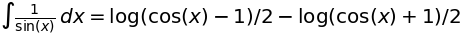

In [18]:
expr = 1/sin(x)
eq = sym.Eq(sym.Integral(expr, x), sym.integrate(expr, x))
print(eq)
eq

# 定積分

Eq(-Integral((-a + x)*(-b + x), (x, a, b)), -(a - b)**3/6)


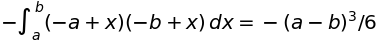

In [19]:
expr = (x-a)*(b-x)
eq = sym.Eq(sym.Integral(expr, (x, a, b)), sym.integrate(expr, (x, a, b))).factor()
print(eq)
eq

Eq(Integral(x/(x**2 + 1), (x, 1, 2)), -log(2)/2 + log(5)/2)


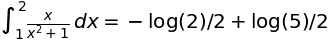

In [20]:
expr = x/(x**2 + 1)
eq = sym.Eq(sym.Integral(expr, (x, 1, 2)), sym.integrate(expr, (x, 1, 2)))
print(eq)
eq

Sympy ではこれ以上展開してくれる（小数表示にしてくれる）方法が見つからなかったので、とりあえず numpyなどから関数を借りてきて次のように計算してみました。

In [21]:
from numpy import log
-log(2)/2 + log(5)/2

## 円周率

円周率は次のような積分で表されます。

Eq(Integral(4/(x**2 + 1), (x, 0, 1)), pi)


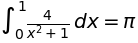

In [22]:
expr = 4/(x**2 + 1)
eq = sym.Eq(sym.Integral(expr, (x, 0, 1)), sym.integrate(expr, (x, 0, 1)))
print(eq)
eq

# Scipy.integrate を使った方法

In [23]:
from scipy import integrate

積分したい式を関数で用意します。

In [24]:
func = lambda x: 4 / (x ** 2 + 1)

integrate.quad で、積分と、推定誤差が得られます。

In [25]:
integrate.quad(func, 0, 1)

## 台形則とシンプソン則

台形則やシンプソン則により積分するには、あらかじめ刻み幅を指定しておく必要があります。

In [26]:
import numpy as np
x=np.linspace(0,1,5)

In [27]:
integrate.trapz(func(x), x) # 台形則

In [28]:
integrate.simps(func(x), x) # シンプソン則